In [ ]:
pip install tsai


INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB

In [ ]:
from tsai.inference import load_learner

clf = load_learner("models/clf.pkl")
probas, target, preds = clf.get_X_preds(X[splits[1]], y[splits[1]])

In [ ]:
from tsai.all import *

epoch,train_loss,valid_loss,accuracy,time
0,0.930596,0.758486,0.360000,00:03
1,0.937737,0.755743,0.360000,00:02
2,0.912378,0.754075,0.360000,00:01
3,0.910226,0.753262,0.360000,00:01
4,0.899217,0.753013,0.360000,00:01
5,0.882781,0.752933,0.360000,00:01
6,0.864995,0.752985,0.360000,00:01
7,0.838101,0.753144,0.360000,00:01
8,0.818448,0.753463,0.360000,00:01
9,0.794666,0.754053,0.360000,00:01


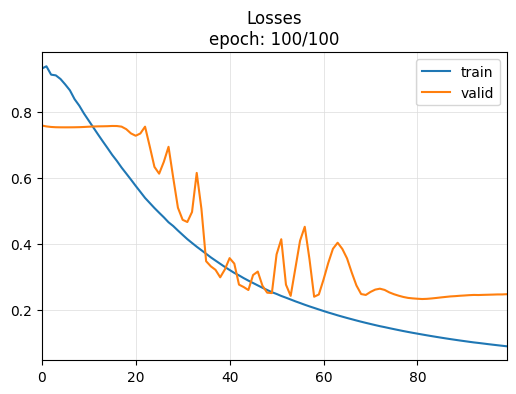

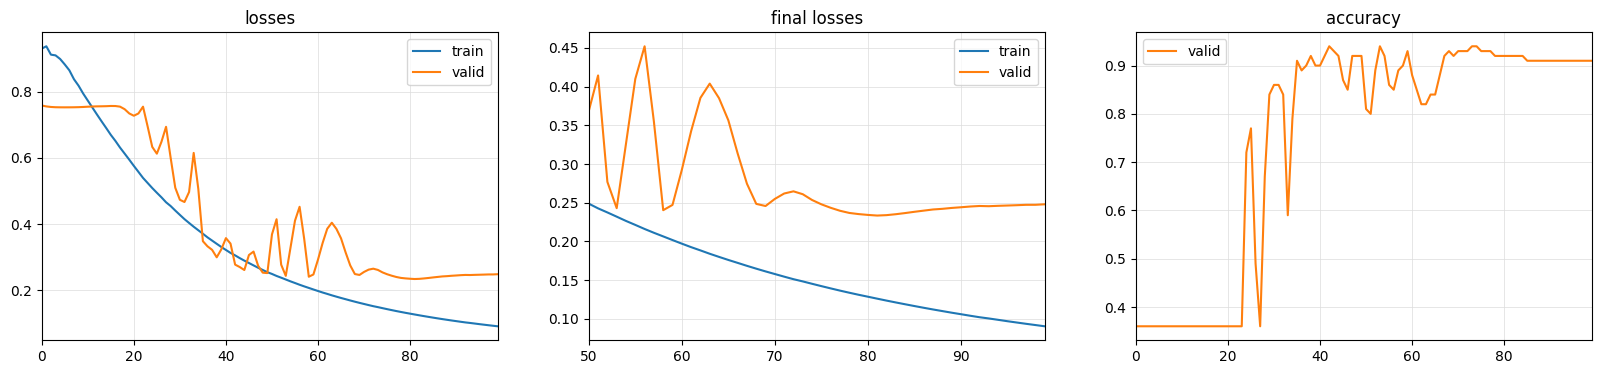

In [ ]:
from tsai.basics import *

X, y, splits = get_classification_data('ECG200', split_data=False)
tfms = [None, TSClassification()]
batch_tfms = TSStandardize()
clf = TSClassifier(X, y, splits=splits, path='models', arch="InceptionTimePlus", tfms=tfms, batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
clf.fit_one_cycle(100, 3e-4)
clf.export("clf.pkl")

In [ ]:
from tsai.inference import load_learner

clf = load_learner("models/clf.pkl")
probas, target, preds = clf.get_X_preds(X[splits[1]], y[splits[1]])


epoch,train_loss,valid_loss,accuracy,time
0,1.584543,2.186260,0.270479,00:18
1,1.321181,2.414565,0.385645,00:20
2,1.177374,1.446685,0.552311,00:18
3,1.094374,1.166651,0.639092,00:19
4,0.994047,1.094137,0.645174,00:20
5,0.902420,1.012974,0.673155,00:19
6,0.818458,0.942259,0.682887,00:19
7,0.726975,0.895608,0.713301,00:21
8,0.634897,0.883354,0.713706,00:21
9,0.563692,0.888760,0.714517,00:18


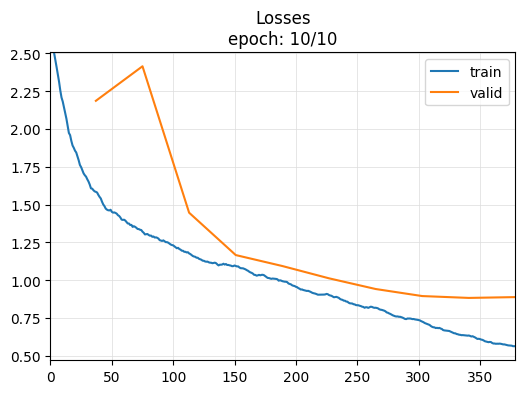

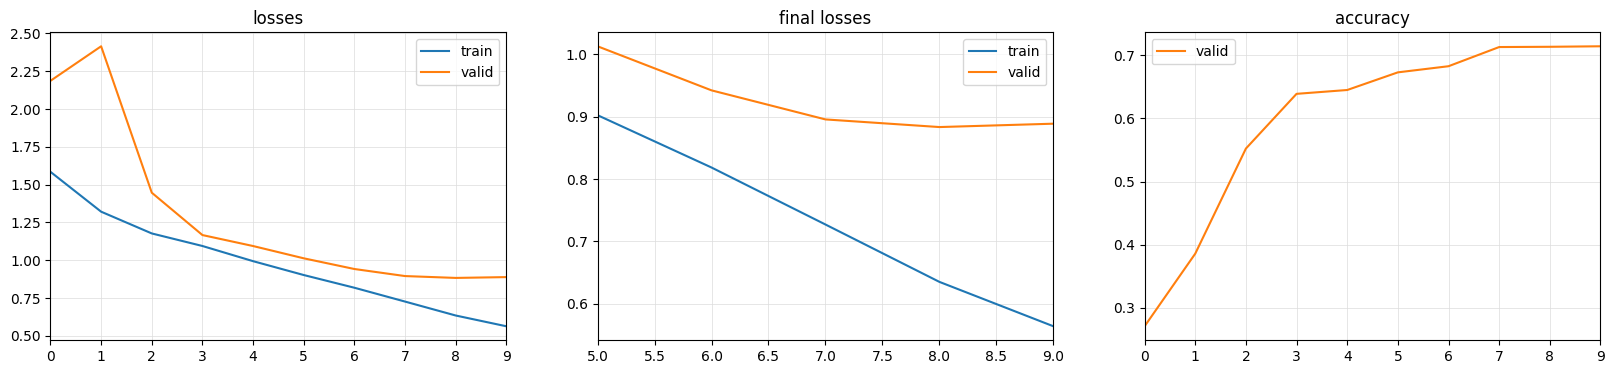

In [ ]:
from tsai.basics import *

X, y, splits = get_classification_data('LSST', split_data=False)
tfms = [None, TSClassification()]
batch_tfms = TSStandardize(by_sample=True)
mv_clf = TSClassifier(X, y, splits=splits, path='models', arch="InceptionTimePlus", tfms=tfms, batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
mv_clf.fit_one_cycle(10, 1e-2)
mv_clf.export("mv_clf.pkl")

In [ ]:
from tsai.inference import load_learner

mv_clf = load_learner("models/mv_clf.pkl")
probas, target, preds = mv_clf.get_X_preds(X[splits[1]], y[splits[1]])

119it [00:06, 19.22it/s]
66it [00:01, 33.35it/s]

arch: TSTPlus(c_in=24 c_out=1 seq_len=144 arch_config={} kwargs={})


epoch,train_loss,valid_loss,_rmse,time
0,233.441483,208.844498,14.451453,00:04
1,230.267334,207.633469,14.409492,00:04
2,223.219131,206.554871,14.372017,00:02
3,220.147095,205.532150,14.336392,00:03
4,220.925797,204.549438,14.302078,00:04
5,218.750717,203.522873,14.266145,00:03
6,217.252853,202.453171,14.228604,00:03
7,212.686249,201.322311,14.188809,00:03
8,208.605927,200.148026,14.147368,00:03
9,204.792999,198.880905,14.102514,00:03


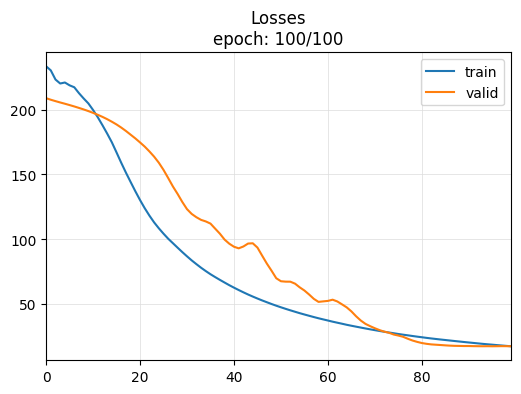

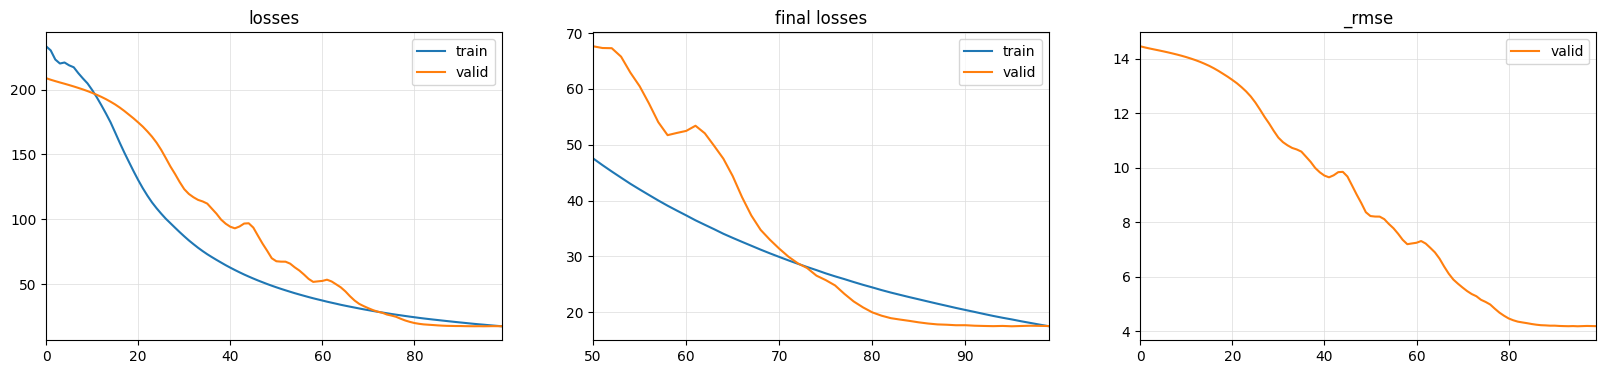

In [ ]:
from tsai.basics import *

X, y, splits = get_regression_data('AppliancesEnergy', split_data=False)
tfms = [None, TSRegression()]
batch_tfms = TSStandardize(by_sample=True)
reg = TSRegressor(X, y, splits=splits, path='models', arch="TSTPlus", tfms=tfms, batch_tfms=batch_tfms, metrics=rmse, cbs=ShowGraph(), verbose=True)
reg.fit_one_cycle(100, 3e-4)
reg.export("reg.pkl")

In [ ]:
from tsai.inference import load_learner

reg = load_learner("models/reg.pkl")
raw_preds, target, preds = reg.get_X_preds(X[splits[1]], y[splits[1]])